In [97]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
performance = pickle.load(open("class_performance.pickle", "rb"))

In [98]:
p = {}

for class_type in performance.keys():
    s = []
    for it in performance[class_type]:
        d[class_type] += 1
        s += [it["successes"]]
    s = np.asarray(s)
    mrr_range = np.arange(1,s.shape[1]+1)
    p[class_type] = {
        "p": np.mean(np.sum(s, axis=1)/s.shape[1]),
        "mrr": np.mean(np.max(s / np.arange(1,s.shape[1]+1), axis=1))
    }

In [99]:
import pandas as pd
df_scores = pd.DataFrame(p).T
df_scores.sort_values("p", ascending=False)

,p,mrr
Bottle,0.529032,0.639785
HumanHead,0.498039,0.679739
Chess,0.438095,0.830159
Jet,0.423776,0.653846
Sword,0.407547,0.575472
...,...,...
Drum,0.030000,0.043333
Vase,0.020000,0.022500
Sign,0.013333,0.016667
ComputerKeyboard,0.010000,0.050000


In [100]:
df_scores.loc["Vase"]

p      0.0200
mrr    0.0225
Name: Vase, dtype: float64

In [101]:
np.mean(df_scores["p"]), np.mean(df_scores["mrr"])

(np.float64(0.168808194791177), np.float64(0.33569627802879853))

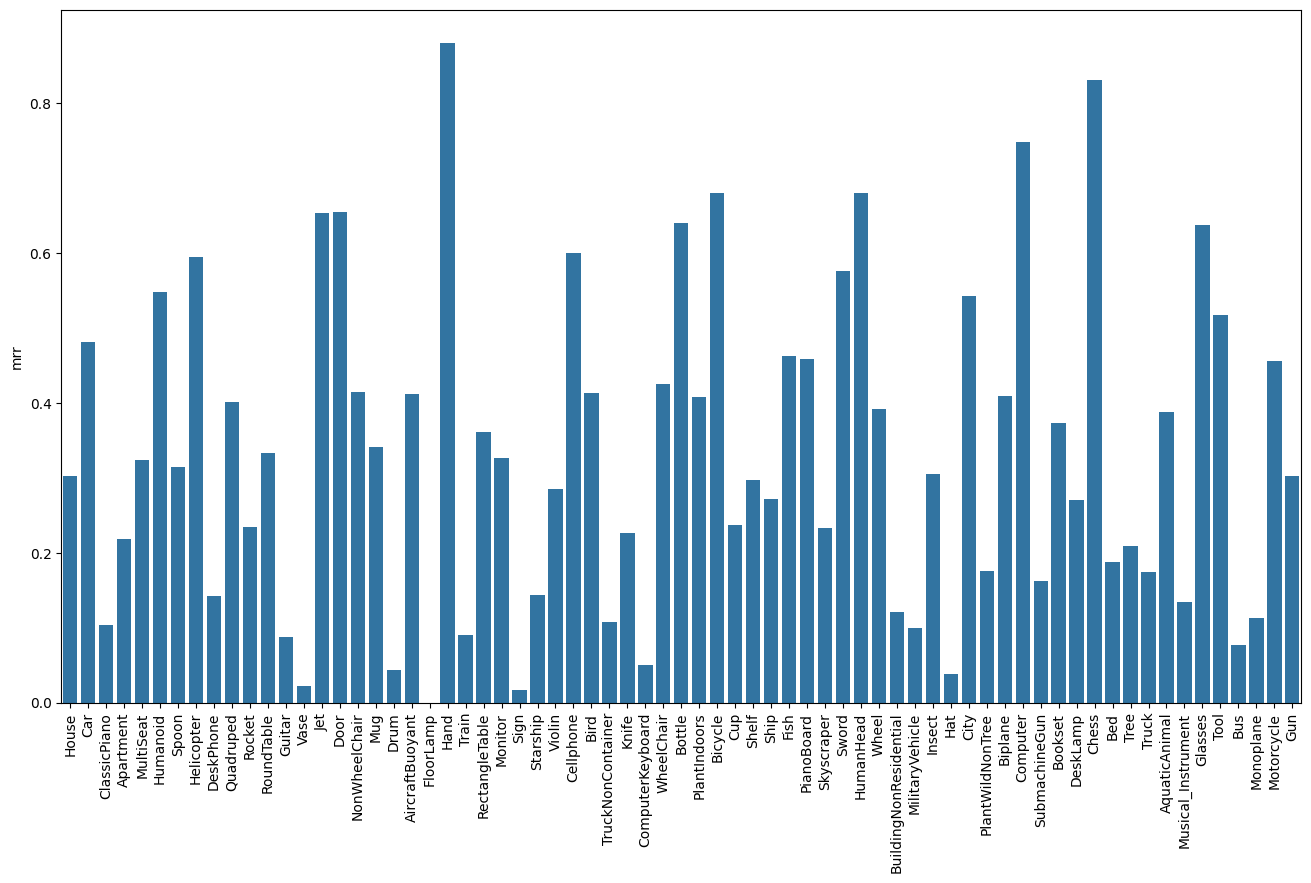

In [102]:
# p = dict(sorted(p.items(), key=lambda x:x[1], reverse=True))
plt.figure(figsize=(16,9))
sns.barplot(df_scores["mrr"])
plt.xticks(rotation=90)
plt.show()

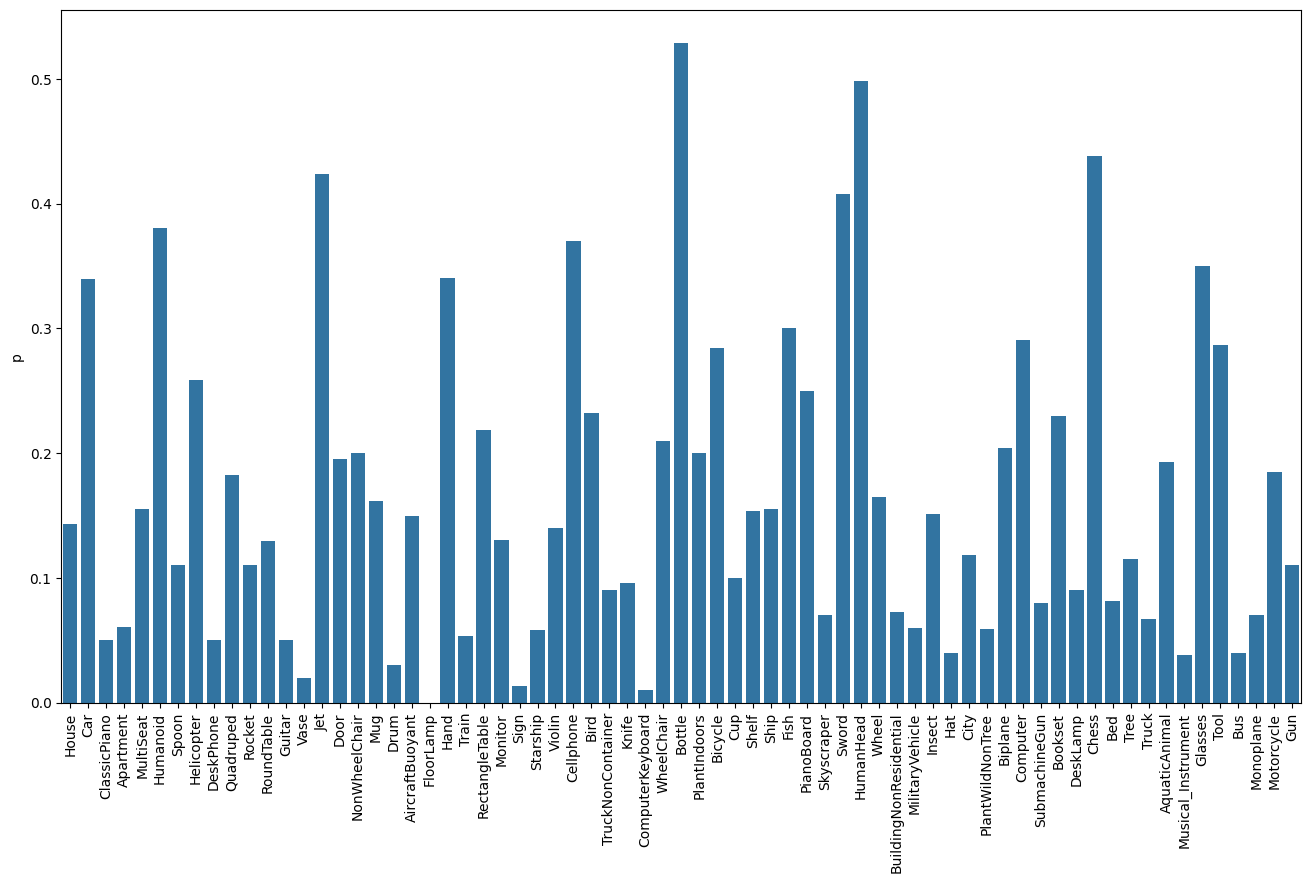

In [103]:
plt.figure(figsize=(16,9))
sns.barplot(df_scores["p"])
plt.xticks(rotation=90)
plt.show()